In [1]:
from sklearn.datasets import load_diabetes

In [2]:
# 1. 데이터 가져오기
load_diabetes().keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
import numpy as np

# 2~3. X,y 준비하기
X = np.array(load_diabetes()['data'])
y = np.array(load_diabetes()['target'])

In [4]:
X.shape, y.shape

((442, 10), (442,))

In [5]:
# 4. train, test 분류하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)

In [6]:
# 5. model 준비하기
def model(X, W, b):
    predictions = 0
    for i in range(X.shape[-1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# 6. 손실함수 정의하기 
# mse
def mse(a, b):
    mse = ((a-b)**2).mean()
    return mse

# loss function
def loss(X, y, W, b):
    predictions = model(X, W, b)
    L  = mse(y, predictions)
    return L

# 7. gradient 구현하기
def gradient(X, y, W, b):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

# 학습 함수 구현
def learning(X, y, W, b, n, learning_rate):
    losses = []

    for i in range(1, n+1):
        dW, db = gradient(X, y, W, b)
        W -= learning_rate * dW
        b -= learning_rate * db
        L = loss(X, y, W, b)
        losses.append(L)

        if i%100 == 0:
            print(f'Iteration {i} : Loss {L:0.4f}')

    return {
        'weight': W,
        'bias': b,
        'losses': losses
    }

In [7]:
# 9. 모델 학습하기
model_params = learning(
    X=X_train,
    y=y_train,
    W=np.random.rand(10),
    b=np.random.rand(),
    n=2000,
    learning_rate=0.001
)

prediction = model(
    X=X_test,
    W=model_params['weight'],
    b=model_params['bias']
)

# 10. test 데이터 성능 확인하기
loss_mse = loss(X_test, y_test, model_params['weight'], model_params['bias'])
print(f'Test MSE : {loss_mse}')

Iteration 100 : Loss 21774.7112
Iteration 200 : Loss 16630.0558
Iteration 300 : Loss 13180.0289
Iteration 400 : Loss 10865.4975
Iteration 500 : Loss 9311.8140
Iteration 600 : Loss 8267.9461
Iteration 700 : Loss 7565.6893
Iteration 800 : Loss 7092.3382
Iteration 900 : Loss 6772.3745
Iteration 1000 : Loss 6555.1971
Iteration 1100 : Loss 6406.9008
Iteration 1200 : Loss 6304.7673
Iteration 1300 : Loss 6233.5741
Iteration 1400 : Loss 6183.1214
Iteration 1500 : Loss 6146.5749
Iteration 1600 : Loss 6119.3551
Iteration 1700 : Loss 6098.3935
Iteration 1800 : Loss 6081.6340
Iteration 1900 : Loss 6067.6990
Iteration 2000 : Loss 6055.6653
Test MSE : 4625.180675795101


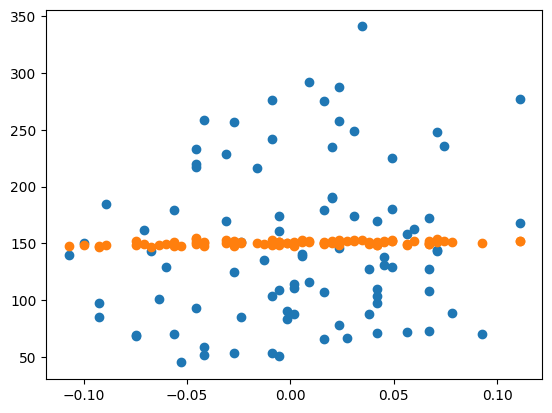

In [8]:
# 11. 정답 데이터와 예측 데이터 시각화
import matplotlib.pyplot as plt 

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

Iteration 100 : Loss 4921.6870
Iteration 200 : Loss 4225.8142
Iteration 300 : Loss 3833.0208
Iteration 400 : Loss 3597.3926
Iteration 500 : Loss 3445.9685
Iteration 600 : Loss 3341.7540
Iteration 700 : Loss 3265.5863
Iteration 800 : Loss 3207.2215
Iteration 900 : Loss 3160.9392
Iteration 1000 : Loss 3123.3618
Iteration 1100 : Loss 3092.3631
Iteration 1200 : Loss 3066.5145
Iteration 1300 : Loss 3044.7976
Iteration 1400 : Loss 3026.4509
Iteration 1500 : Loss 3010.8844
Iteration 1600 : Loss 2997.6291
Iteration 1700 : Loss 2986.3058
Iteration 1800 : Loss 2976.6043
Iteration 1900 : Loss 2968.2688
Iteration 2000 : Loss 2961.0869
Iteration 2100 : Loss 2954.8818
Iteration 2200 : Loss 2949.5057
Iteration 2300 : Loss 2944.8345
Iteration 2400 : Loss 2940.7641
Iteration 2500 : Loss 2937.2065
Iteration 2600 : Loss 2934.0876
Iteration 2700 : Loss 2931.3448
Iteration 2800 : Loss 2928.9248
Iteration 2900 : Loss 2926.7826
Iteration 3000 : Loss 2924.8797
Iteration 3100 : Loss 2923.1835
Iteration 3200 : 

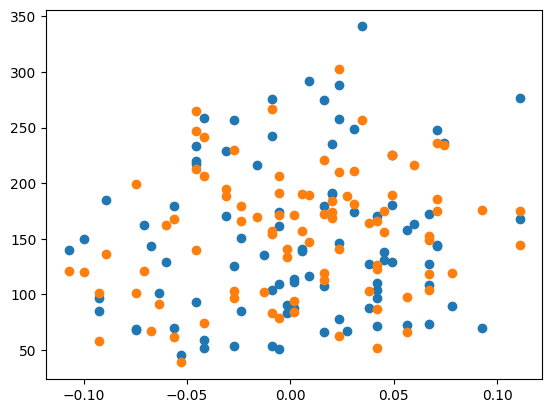

In [9]:
# epochs, learning_rate 수정
model_params = learning(
    X=X_train,
    y=y_train,
    W=np.random.rand(10),
    b=np.random.rand(),
    n=5000,
    learning_rate=0.2
)

prediction = model(
    X=X_test,
    W=model_params['weight'],
    b=model_params['bias']
)

loss_mse = loss(X_test, y_test, model_params['weight'], model_params['bias'])
print(f'Test MSE : {loss_mse}')

import matplotlib.pyplot as plt 

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [10]:
print(f'Test MSE : {loss_mse}')

Test MSE : 2836.8352795466158
